In [1]:
# As this is a different file we are going to import the needed files and libraries.

import pandas as pd
import numpy as np

train = pd.read_csv(r'C:\Users\Oscar Marino\Documents\Henry\DFT 04 - Henry Course\Proyectos Individuales\PI2---Machine-Learning-Project\Train_pipeline')
data_standardized = pd.read_csv(r'C:\Users\Oscar Marino\Documents\Henry\DFT 04 - Henry Course\Proyectos Individuales\PI2---Machine-Learning-Project\data_standardized_pipeline')

In [2]:
# To define the model we are going to use the data_standarized Dataframe that is the Train dataset that is standardized.
X = data_standardized
y = train['target']

from sklearn.model_selection import train_test_split
# We are going to split our data in Train and Test to assess our model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y)

# The train data will be our dev for experimenting with different models and hyperparameters, and the test set will se our hold-out.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(92354, 8) (39581, 8) (92354,) (39581,)


In [13]:
# We import the libraries needed.

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

## ML Models

### Regular models

#### Decision tree

In [ ]:
# We define the model
dtc_model = DecisionTreeClassifier(max_depth=12, random_state=42)

# Trian it.
dtc_model.fit(X_train, y_train)

# Obtain some metrics.
print('Number of features:',dtc_model.max_features_)
print('Preponderance of the variables:',dtc_model.feature_importances_)
# Where we can see that Bathroom is the most important feature.

In [ ]:
# Predicting instances to evaluate the model.
y_train_pred = dtc_model.predict(X_train)
y_test_pred = dtc_model.predict(X_test)

In [ ]:
# We calculate the accuracy and the recall of the model with train data.
print('The accuracy of the model is',accuracy_score(y_train, y_train_pred))
print('The recall of the model is',recall_score(y_train, y_train_pred))

# # Also with test data.
print('The accuracy of the model is',accuracy_score(y_test, y_test_pred))
print('The recall of the model is',recall_score(y_test, y_test_pred))

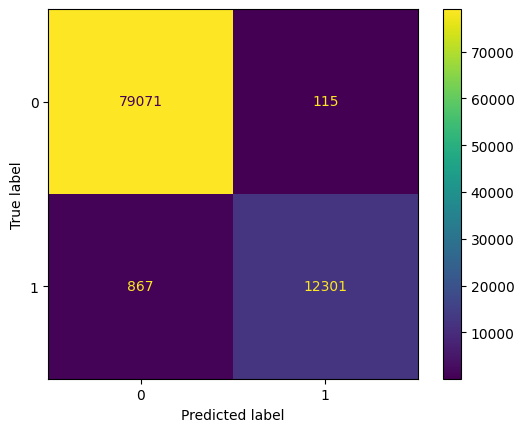

In [15]:
# Using confusion_matrix we obtain a binary classification matrix where we can see the predicted instances.
matrix = confusion_matrix(y_train, y_train_pred)

# We plot the confusion matrix
cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [17]:
# Using classification report we obtain several measurments to see how our model is performing.
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     79186
           1       0.99      0.93      0.96     13168

    accuracy                           0.99     92354
   macro avg       0.99      0.97      0.98     92354
weighted avg       0.99      0.99      0.99     92354



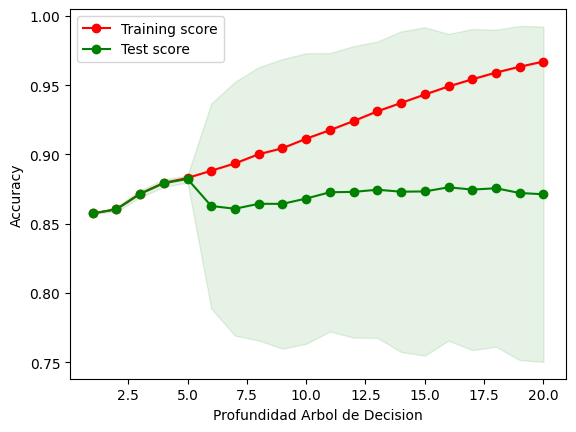

In [18]:
# Code for deciding the appropiate depth of the tree.
tree_train_score_mean = []
tree_train_score_std = []
tree_test_score_mean = []
tree_test_score_std =[]

deepness = np.arange(1,21)

for deep in deepness:
    
    tcmcv = DecisionTreeClassifier(max_depth = deep)
    tree_scores = cross_validate(tcmcv, X, y, cv = 10, return_train_score=True, n_jobs = -1) 
    
    tree_train_score_mean.append(tree_scores['train_score'].mean())
    tree_train_score_std.append(tree_scores['train_score'].std())
     
    tree_test_score_mean.append(tree_scores['test_score'].mean())
    tree_test_score_std.append(tree_scores['test_score'].std())
    

tree_train_score_mean = np.array(tree_train_score_mean)
tree_train_score_std = np.array(tree_train_score_std)

tree_test_score_mean = np.array(tree_test_score_mean)
tree_test_score_std = np.array(tree_test_score_std)

plt.fill_between(deepness, tree_train_score_mean - tree_train_score_std,
                 tree_train_score_mean + tree_train_score_std, alpha=0.1,
                 color="r")
plt.fill_between(deepness, tree_test_score_mean - tree_test_score_std,
                 tree_test_score_mean + tree_test_score_std, alpha=0.1, color="g")

plt.plot(deepness, tree_train_score_mean, 'o-', color="r",
         label="Training score")
plt.plot(deepness, tree_test_score_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

#### K neirest neighbours

In [ ]:
# Instancing the model.
clf = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Training it.
clf.fit(X,y)

In [ ]:
# Predicting instances.
y_train_pred = clf.predict(X_train)

In [ ]:
# Confussion matrix
matrix = confusion_matrix(y_train, y_train_pred)

cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()

In [ ]:
# Using classification report we obtain several measurments to see how our model is performing.
print(classification_report(y_train, y_train_pred))

In [ ]:
# Code for deciding the appropiate number of neighbours for the model.
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

n_vecinos = np.arange(1,20,1)
i = 0
i_max = len(n_vecinos)
for vecinos in n_vecinos:
    i = i + 1
    clf = KNeighborsClassifier(n_neighbors=vecinos)
    knn_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())
    

knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

### Ensambling

#### Bosting

In [4]:
# Instancing the model.
clf_xgb = xgb.XGBClassifier(n_estimators=150,
                            seed=42, use_label_encoder= False)
                            
# training it.
clf_xgb.fit(X_train, y_train)

c:\Users\Oscar Marino\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [5]:
# assesing the ensambling.

y_train_pred = clf_xgb.predict(X_train)
y_test_pred = clf_xgb.predict(X_test)

# Metrics
print('Accuracy in train:', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy in test:', metrics.accuracy_score(y_test, y_test_pred))

print('Recall in train:', metrics.recall_score(y_train, y_train_pred))
print('Recall in test:', metrics.recall_score(y_test, y_test_pred))

Accuracy in train: 0.9323039608463087
Accuracy in test: 0.9144286400040423
Recall in train: 0.6553766707168894
Recall in test: 0.5869950389794472


#### Random forests

In [6]:
# Instancing the model.
# We are going to let the model to overfit, taking 2/3 of the data randomly allowing it to repeat records.
forest_model = RandomForestClassifier(n_estimators = 100, max_depth = None, criterion='gini', max_features='sqrt', bootstrap = True, max_samples=2/3, oob_score=True, n_jobs=-1)

In [7]:
# Training the mode.
forest_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6666666666666666, n_jobs=-1,
                       oob_score=True)

In [8]:
# Predicting tags with the model for the target column.
y_train_pred = forest_model.predict(X_train)
y_test_pred = forest_model.predict(X_test)

# As we can see the model is good for obtaining the correct classification when all the data is taking into accound. However, its predictions are weak for classifying the
# the expensive properties over all the cases we are trying to identify..
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

# Thiese are the meassurements we are interested in.
print(metrics.recall_score(y_train, y_train_pred))
print(metrics.recall_score(y_test, y_test_pred))

0.9893670008878879
0.9124327328768854
0.9341585662211421
0.6002834868887313


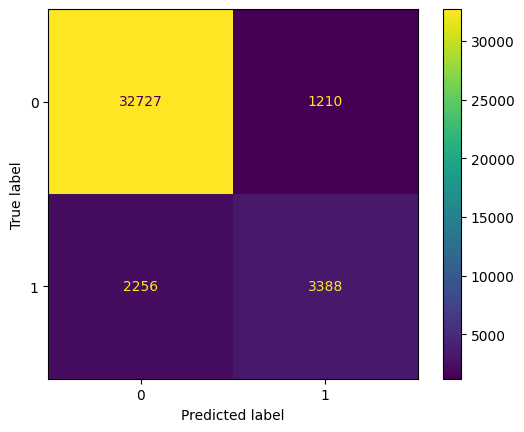

In [16]:
# We obtain the confussion matrix for the test data and plot it.
matrix = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(matrix)

cm_display.plot()
plt.show()